In [709]:
#bueno en este notebook se realizara el analisis exploratorio de datos de la base correspondiente
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#subida del dataset
datos = pd.read_csv("C:\\Users\\siroq\\TPFINALCDD\\bank_subscription.csv",sep=';') #muy importante el segundo parametro porque sino me ponia todo en una sola columna 

#perdon por el no seguimiento de la consigna el analisis exploratorio y el curado del dataset se realizaron ambos en este notebool

In [710]:
#un poquito de visualizacion
print(datos.shape)
print("")
print(datos.head())

(45211, 17)

    Age           Job Marital Status  Education Credit  Balance (euros)  \
0  58.0           NaN            NaN        NaN     no           2143.0   
1  44.0    technician         single  secondary     no              NaN   
2  33.0  entrepreneur            NaN  secondary     no              2.0   
3  47.0           NaN        married    unknown     no           1506.0   
4  33.0       unknown         single    unknown    NaN              1.0   

  Housing Loan Personal Loan  Contact  Last Contact Day Last Contact Month  \
0          yes           NaN  unknown                 5                may   
1          yes            no  unknown                 5                may   
2          yes           yes  unknown                 5                may   
3          NaN            no  unknown                 5                may   
4           no            no  unknown                 5                may   

   Last Contact Duration  Campaign  Pdays  Previous Poutcome  Subsc

In [711]:
datos.columns 

Index(['Age', 'Job', 'Marital Status', 'Education', 'Credit',
       'Balance (euros)', 'Housing Loan', 'Personal Loan', 'Contact',
       'Last Contact Day', 'Last Contact Month', 'Last Contact Duration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype='object')

In [712]:
print("Se observa que hay varibles que contienen espacios en su nombre asi que cambiaremos dichos nombres")
datos.rename(columns={"Marital Status": "Marital_Status"}, inplace=True)
datos.rename(columns={"Balance (euros)": "Balance"}, inplace=True)
datos.rename(columns={"Last Contact Duration": "CDuration"}, inplace=True)
datos.rename(columns={"Housing Loan": "HousingL"}, inplace=True)
datos.rename(columns={"Personal Loan": "PersonalL"}, inplace=True)
datos.rename(columns={"Last Contact Month": "LCM"}, inplace=True)
datos.rename(columns={"Last Contact Day": "LCD"}, inplace=True)

#verificacion
datos.columns

Se observa que hay varibles que contienen espacios en su nombre asi que cambiaremos dichos nombres


Index(['Age', 'Job', 'Marital_Status', 'Education', 'Credit', 'Balance',
       'HousingL', 'PersonalL', 'Contact', 'LCD', 'LCM', 'CDuration',
       'Campaign', 'Pdays', 'Previous', 'Poutcome', 'Subscription'],
      dtype='object')

In [713]:
print("eliminamos las variables LCM y LCD por ser consideradas inutiles en el analisis y ruidosas")
columnas_a_eliminar = ['LCD', 'LCM']
datos = datos.drop(columnas_a_eliminar, axis=1)
print("verificamos", datos.shape)

eliminamos las variables LCM y LCD por ser consideradas inutiles en el analisis y ruidosas
verificamos (45211, 15)


Text(0.5, 1.0, 'Grafico de torta subcriptos vs no subscriptos')

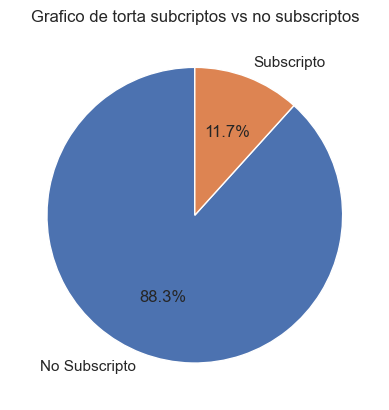

In [679]:
#me parece importante ver cuantos de los clientes estan subcriptos
conteo = datos.Subscription.value_counts()
plt.pie(conteo, labels=("No Subscripto", "Subscripto"), autopct='%1.1f%%', startangle=90)
# agregamos un titulo bonito
plt.title("Grafico de torta subcriptos vs no subscriptos")

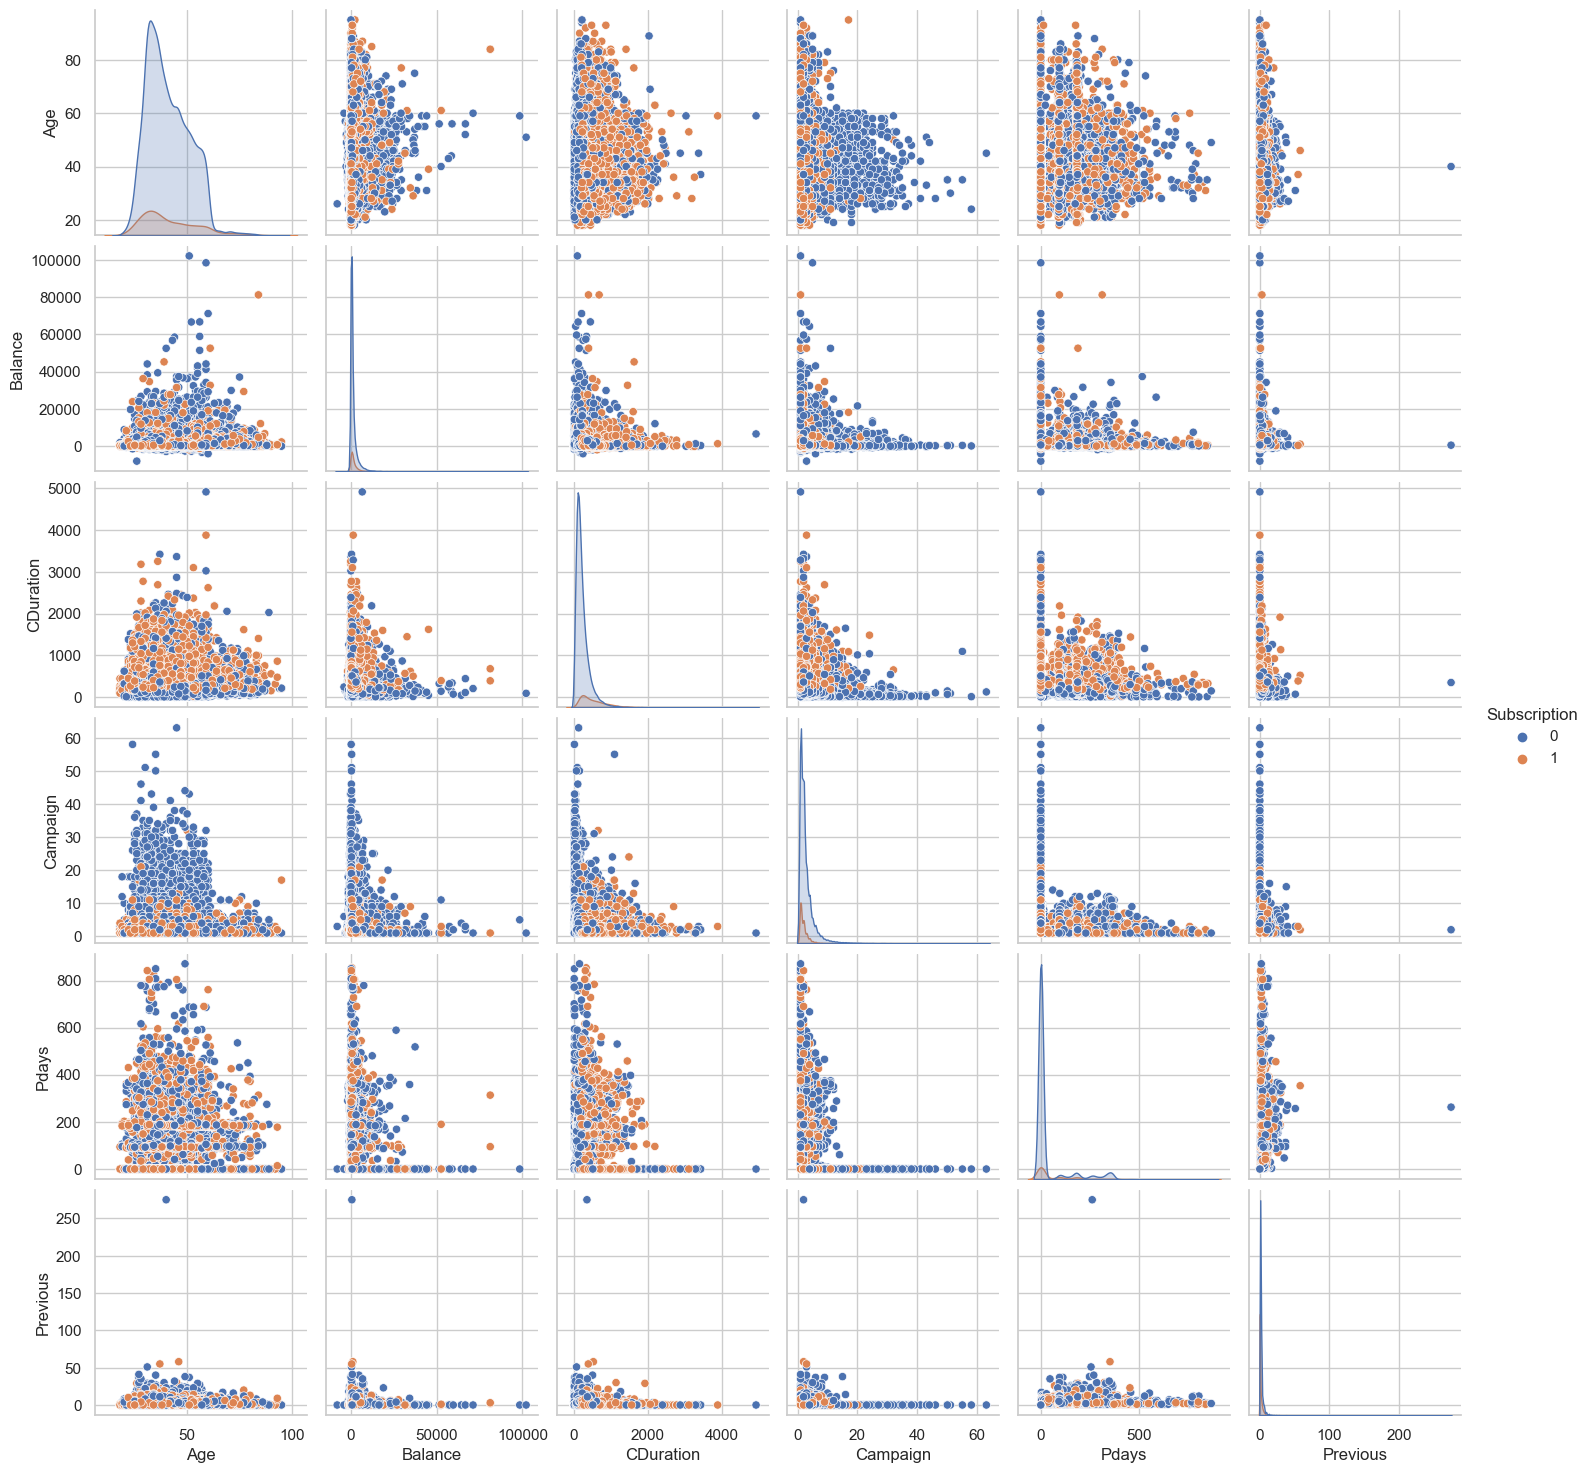

In [680]:
#Realizamos un pairplot para ver la relacion entre variables
sns.pairplot(data=datos, hue='Subscription')
plt.show()


In [681]:
print("A continuacion se haran el analisis de las variables y el tratamiento de datos faltantes y outliers comenzando por las numericas y luego las categoricas")
total = datos.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (datos.isnull().sum()/len(datos)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data


A continuacion se haran el analisis de las variables y el tratamiento de datos faltantes y outliers comenzando por las numericas y luego las categoricas


,Total,Percent
HousingL,7686,0.170003
PersonalL,7686,0.170003
CDuration,7686,0.170003
Pdays,7686,0.170003
Age,4973,0.109995
Job,4973,0.109995
Marital_Status,4973,0.109995
Education,4973,0.109995
Credit,4973,0.109995
Balance,4973,0.109995


In [244]:
#veamos cuanto perdemos del dataset si tiramos los nulos a la basura
datos.dropna(how ='any', inplace = True)
print(datos.shape)
print("se elimino aproximadamente un 75% de los registros lo cual no es aceptable, a continuacion se haran sustituciones para evitar una perdida tan grande")
#NO CORRER ESTA LINEA, SINO DEBEN VOLVER A CORRERSE LAS ANTERIORES

(10630, 17)
se elimino aproximadamente un 75% de los registros lo cual no es aceptable, a continuacion se haran sustituciones para evitar una perdida tan grande


In [682]:
#variable edad
print("Variable Edad \n",datos.Age.describe(),"\n") 
Q = datos.Age.shape[0]
nulos = datos["Age"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")

Variable Edad 
 count    40238.000000
mean        40.929768
std         10.631666
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: Age, dtype: float64 

la cantidad de valores nulos en la variable es de 4973 ,es decir, un 10.999535511269382 % de los datos totales


In [683]:
#para el tratamiento de esta variable se reemplazara por la media
media = datos['Age'].mean()
media_redondeada = round(media)
datos['Age'].fillna(media_redondeada, inplace=True)
nulos = datos["Age"].isnull().sum()
print("revisamos efectivamente que no haya nulos imprimiendo la variable con dicho nombre.","Nulos =",nulos)

revisamos efectivamente que no haya nulos imprimiendo la variable con dicho nombre. Nulos = 0


Variable Balance 
 count     40238.000000
mean       1367.154257
std        3079.452512
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1425.750000
max      102127.000000
Name: Balance, dtype: float64 

cantidad de personas con balance positivo y negativo
Positivos 33748 
 Negativos 3336 

la cantidad de valores nulos en la variable es de 4973 ,es decir, un 10.999535511269382 % de los datos totales
Veamos los datos en un boxplot


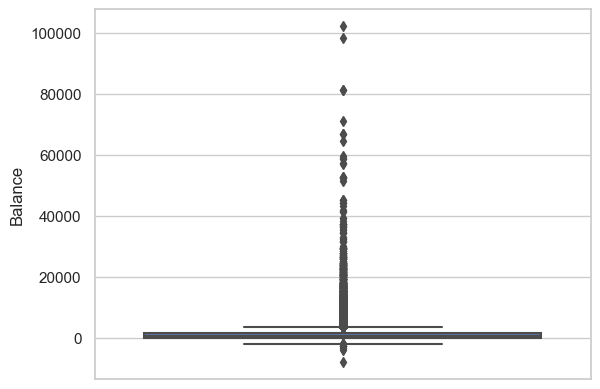

In [684]:
#Variable Balance
print("Variable Balance \n",datos.Balance.describe(),"\n")
print("cantidad de personas con balance positivo y negativo")
Positivos = (datos['Balance'] > 0).sum()
Negativos= (datos['Balance'] < 0).sum()
print("Positivos", Positivos, "\n" ,"Negativos",Negativos, "\n")
Q = datos.Balance.shape[0]
nulos = datos["Balance"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")
print("Veamos los datos en un boxplot")
sns.boxplot(y=datos.Balance)
plt.show()

In [685]:
print("teniendo algunos valores tan altos la media se ve distorcionada, por lo que en este caso se reemplazaran los faltantes por el valor de la mediana.")
mediana = datos['Balance'].median()
datos['Balance'].fillna(mediana, inplace=True)
nulos = datos["Balance"].isnull().sum()
print("revisamos efectivamente que no haya nulos imprimiendo la variable con dicho nombre.","Nulos =",nulos)

teniendo algunos valores tan altos la media se ve distorcionada, por lo que en este caso se reemplazaran los faltantes por el valor de la mediana.
revisamos efectivamente que no haya nulos imprimiendo la variable con dicho nombre. Nulos = 0


In [686]:
print("ademas se revalorizaran los outliers")
def ajustar_balance(valor):
    if valor > 80000:
        return 80000
    elif valor < -4500:
        return -4000
    else:
        return valor
datos['Balance'] = datos['Balance'].apply(ajustar_balance)
print("verificamos", datos.Balance.describe())

ademas se revalorizaran los outliers
verificamos count    45211.000000
mean      1265.190418
std       2890.212989
min      -4057.000000
25%        105.000000
50%        448.000000
75%       1232.500000
max      80000.000000
Name: Balance, dtype: float64


In [687]:
#variable Last contact duration
print("Variable Last Contact Duration \n",datos.CDuration.describe(),"\n") 
Q = datos.CDuration.shape[0]
nulos = datos["CDuration"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")
print("\n Como quedo en evidencia en el pairplot, esta variable es importante para determinar la subcripcion aquellos clientes con un bajo tiempo de contacto son propensos a rechazar la subcripcion por eso se utilizara este criterio para la asignacion de nulos")


Variable Last Contact Duration 
 count    37525.000000
mean       258.511446
std        257.827942
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: CDuration, dtype: float64 

la cantidad de valores nulos en la variable es de 7686 ,es decir, un 17.000287540642763 % de los datos totales

 Como quedo en evidencia en el pairplot, esta variable es importante para determinar la subcripcion aquellos clientes con un bajo tiempo de contacto son propensos a rechazar la subcripcion por eso se utilizara este criterio para la asignacion de nulos


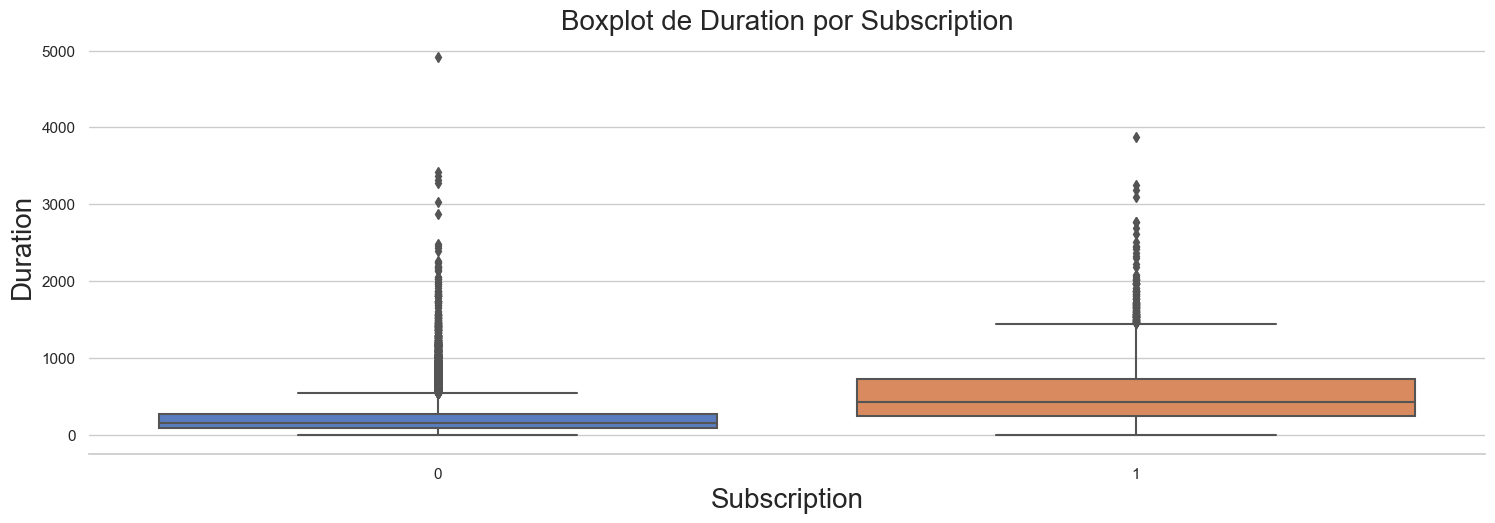

In [688]:
# Crea el boxplot para visualizar las medianas
g = sns.catplot(data=datos,
                x="Subscription", y="CDuration",
                kind="box",
                palette="muted",
                height=5, aspect=3)
g.despine(left=True)  # Para quitar línea del Y del plot
g.set_xticklabels(rotation=0)
plt.xlabel("Subscription", size=20)
plt.ylabel("Duration", size=20)
plt.title('Boxplot de Duration por Subscription', size=20)
plt.show()




In [689]:
# Calcula las medianas para Subscription=0 y Subscription=1
print("el criterio sera el siguiente: se asignara la mediana de cada boxplot en funcion de la subscripcion")

# Mediana para Subscription igual a 0
mediana_subscription_0 = datos.loc[datos['Subscription'] == 0, 'CDuration'].median()

# Mediana para Subscription igual a 1
mediana_subscription_1 = datos.loc[datos['Subscription'] == 1, 'CDuration'].median()

# Aplicar la lógica solo a los valores NaN en 'CDuration'
datos['CDuration'] = datos.apply(
    lambda row: mediana_subscription_0 if pd.isna(row['CDuration']) and row['Subscription'] == 0 else
                 mediana_subscription_1 if pd.isna(row['CDuration']) and row['Subscription'] == 1 else
                 row['CDuration'],
    axis=1
)

# Verifica que los valores nulos se hayan imputado correctamente
print("la cantidad de nulos es de ",datos['CDuration'].isnull().sum())

el criterio sera el siguiente: se asignara la mediana de cada boxplot en funcion de la subscripcion
la cantidad de nulos es de  0


In [690]:
print("ademas se eliminara el maximo considerado como outlier despues de analizar el pairplot")
indice_maximo = datos['CDuration'].idxmax()
datos = datos.drop(indice_maximo)
print("verificacion", datos.CDuration.describe())

ademas se eliminara el maximo considerado como outlier despues de analizar el pairplot
verificacion count    45210.000000
mean       247.589040
std        237.710283
min          0.000000
25%        118.000000
50%        164.000000
75%        296.000000
max       3881.000000
Name: CDuration, dtype: float64


In [691]:

print("Variable Campaign \n",datos.Campaign.describe(),"\n")
Q = datos.Campaign.shape[0]
nulos = datos["Campaign"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


Variable Campaign 
 count    45210.000000
mean         2.763880
std          3.098044
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: Campaign, dtype: float64 

la cantidad de valores nulos en la variable es de 0 ,es decir, un 0.0 % de los datos totales


no presenta valores faltantes pero analisemos los outliers


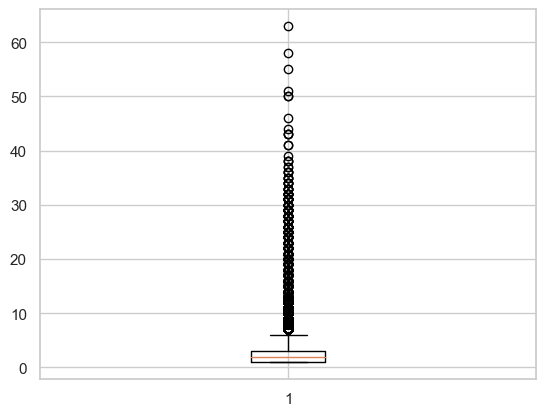

se observa gran cantidad de outliers porque la mayoria de datos (hasta el 75%) son menores a 3
asignaremos el valor de 40 para aquellos datos que lo superen


In [692]:
print("no presenta valores faltantes pero analisemos los outliers")
plt.boxplot(x=datos.Campaign)
plt.show()
print("se observa gran cantidad de outliers porque la mayoria de datos (hasta el 75%) son menores a 3")
print("asignaremos el valor de 40 para aquellos datos que lo superen")


In [693]:
# Asignar el valor de 40 a aquellos datos en 'campaing' que sean mayores a 40
datos.loc[datos['Campaign'] > 40, 'Campaign'] = 40

# Verificar el DataFrame después de la asignación
print("verificacion",datos.Campaign.describe())

verificacion count    45210.000000
mean         2.761491
std          3.063858
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: Campaign, dtype: float64


In [694]:

print("Variable Pdays \n",datos.Pdays.describe(),"\n")
Q = datos.Pdays.shape[0]
nulos = datos["Pdays"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


Variable Pdays 
 count    37524.000000
mean        40.021639
std         99.729536
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: Pdays, dtype: float64 

la cantidad de valores nulos en la variable es de 7686 ,es decir, un 17.000663570006637 % de los datos totales


In [695]:

print("viendo que el 75% de los datos es igual a -1 se remplazaran los faltantes por dicho valor")
datos['Pdays'].fillna(-1, inplace=True)
print("la cantidad de nulos es de ",datos['Pdays'].isnull().sum())

viendo que el 75% de los datos es igual a -1 se remplazaran los faltantes por dicho valor
la cantidad de nulos es de  0


In [696]:
print("Variable Previous \n",datos.Previous.describe(),"\n")
Q = datos.Previous.shape[0]
nulos = datos["Previous"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


Variable Previous 
 count    45210.000000
mean         0.580336
std          2.303465
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: Previous, dtype: float64 

la cantidad de valores nulos en la variable es de 0 ,es decir, un 0.0 % de los datos totales


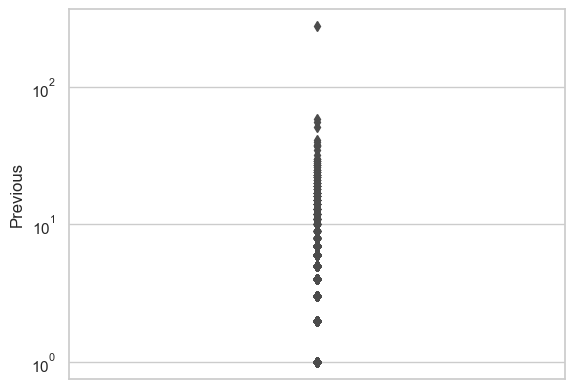

se observa que es un valor muy aislado, veamos la fila a ver si es relevante 

        Age         Job Marital_Status Education Credit  Balance HousingL  \
29182  40.0  management        married  tertiary    NaN    543.0      yes   

      PersonalL   Contact  CDuration  Campaign  Pdays  Previous Poutcome  \
29182        no  cellular      349.0         2  262.0       275    other   

       Subscription  
29182             0  
viendo que contiene un NaN y el es un cliente no subscripto se elimina la fila


In [697]:
#me hace ruido un valor tan alto en la variable previous veamos la distribucion 
sns.boxplot(y=datos["Previous"])
plt.yscale('log')
plt.show()
print("se observa que es un valor muy aislado, veamos la fila a ver si es relevante \n")
fila_outlier = datos[datos['Previous'] == 275]
print(fila_outlier)
print("viendo que contiene un NaN y el es un cliente no subscripto se elimina la fila")
datos= datos[datos['Previous'] != 275]

In [698]:
print("verificacion de previous",datos.Previous.describe())

verificacion de previous count    45209.000000
mean         0.574266
std          1.907947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: Previous, dtype: float64


In [ ]:
print("terminadas las variables numericas veamos las categoricas")

In [699]:
#ahora veamos los valores unicos para las variables categoricas y sus cantidades
print("datos unicos y cantidades en la variable Jobs")
print(datos.Job.value_counts(), "\n")
Q = datos.Job.shape[0]
nulos = datos["Job"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


datos unicos y cantidades en la variable Jobs
blue-collar      8707
management       8393
technician       6747
admin.           4598
services         3700
retired          2000
self-employed    1414
entrepreneur     1315
unemployed       1171
housemaid        1107
student           827
unknown           257
Name: Job, dtype: int64 

la cantidad de valores nulos en la variable es de 4973 ,es decir, un 11.000022119489481 % de los datos totales


In [700]:
print("En esta variable los NaN se asignaran en la variable unknown \n")
datos['Job'] = datos['Job'].fillna("unknown")
print("verificacion de agregado \n",datos.Job.value_counts(), "\n")
print("la cantidad de nulos es de ",datos['Job'].isnull().sum())

En esta variable los NaN se asignaran en la variable unknown 

verificacion de agregado 
 blue-collar      8707
management       8393
technician       6747
unknown          5230
admin.           4598
services         3700
retired          2000
self-employed    1414
entrepreneur     1315
unemployed       1171
housemaid        1107
student           827
Name: Job, dtype: int64 

la cantidad de nulos es de  0


In [701]:
print("Datos unicos y cantidades en la variable Marital status \n", datos.Marital_Status.value_counts(), "\n") 
Q = datos.Marital_Status.shape[0]
nulos = datos["Marital_Status"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


Datos unicos y cantidades en la variable Marital status 
 married     24220
single      11396
divorced     4620
Name: Marital_Status, dtype: int64 

la cantidad de valores nulos en la variable es de 4973 ,es decir, un 11.000022119489481 % de los datos totales


vamos a hacer un boxplot del estado civil en funcion de la edad


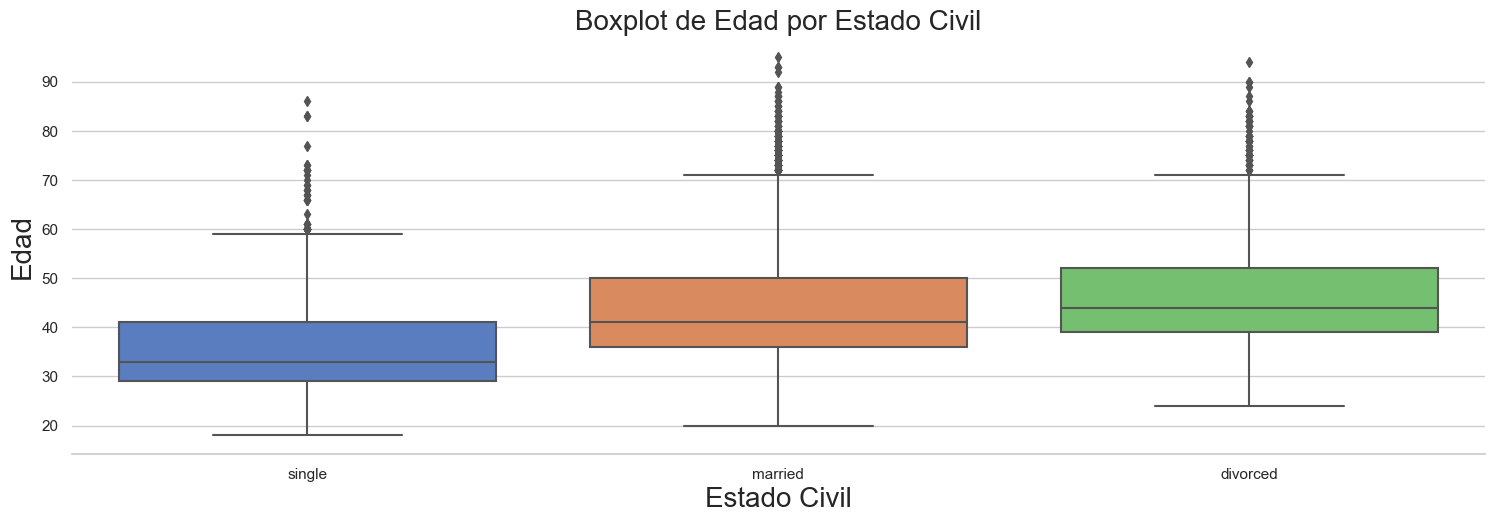

In [703]:
print("vamos a hacer un boxplot del estado civil en funcion de la edad")
g = sns.catplot(data=datos,
                x="Marital_Status", y="Age",
                kind="box",
                palette="muted",
                height=5, aspect=3)
g.despine(left=True)  # Para quitar línea del Y del plot
g.set_xticklabels(rotation=0)
plt.xlabel("Estado Civil", size=20)
plt.ylabel("Edad", size=20)
plt.title('Boxplot de Edad por Estado Civil', size=20)
plt.show()


In [704]:
print("luego de analizar el grafico los NaN de Marital Status se trataran de la siguiente manera:")
print("para valores de edad menores a 32 se asigna soltero, de 32 a 40 casado, y mayores a 40 aleatoreo entre casado y divorciado.")
# Definir una función para asignar Marital_Status basado en la edad
def asignar_estado_civil(row):
    if pd.isna(row['Marital_Status']):
        if row['Age'] < 32:
            return 'single'
        elif 32 <= row['Age'] <= 40:
            return 'married'
        else:
            return np.random.choice(['married', 'divorced'])
    else:
        return row['Marital_Status']

# Aplicar la función a la columna Marital_Status
datos['Marital_Status'] = datos.apply(asignar_estado_civil, axis=1)

print("la cantidad de nulos es de ",datos['Marital_Status'].isnull().sum())


luego de analizar el grafico los NaN de Marital Status se trataran de la siguiente manera:
para valores de edad menores a 32 se asigna soltero, de 32 a 40 casado, y mayores a 40 aleatoreo entre casado y divorciado.
la cantidad de nulos es de  0


In [705]:
print("datos unicos y cantidades en la variable Education", "\n", datos.Education.value_counts(),"\n")
Q = datos.Education.shape[0]
nulos = datos["Education"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")


datos unicos y cantidades en la variable Education 
 secondary    20645
tertiary     11828
primary       6097
unknown       1666
Name: Education, dtype: int64 

la cantidad de valores nulos en la variable es de 4973 ,es decir, un 11.000022119489481 % de los datos totales


In [706]:
print("En este caso tambien asignaremos unknown a los NaN")
datos['Education'] = datos['Education'].fillna("unknown")
print("verificacion de agregado \n",datos.Education.value_counts(), "\n")
print("la cantidad de nulos es de ",datos['Education'].isnull().sum())

En este caso tambien asignaremos unknown a los NaN
verificacion de agregado 
 secondary    20645
tertiary     11828
unknown       6639
primary       6097
Name: Education, dtype: int64 

la cantidad de nulos es de  0


In [707]:
print("Datos unicos y cantidades en la variable credit \n", datos.Credit.value_counts(), "\n") 
Q = datos.Credit.shape[0]
nulos = datos["Credit"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")

Datos unicos y cantidades en la variable credit 
 no     39510
yes      727
Name: Credit, dtype: int64 

la cantidad de valores nulos en la variable es de 4972 ,es decir, un 10.997810170541264 % de los datos totales


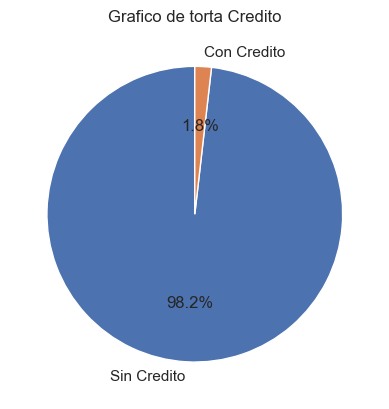

viendo que el 98,2% no posee credito se le asignara el valor NO a los NaN
la cantidad de nulos es de  0


In [708]:
conteo = datos.Credit.value_counts()
plt.pie(conteo, labels=("Sin Credito", "Con Credito"), autopct='%1.1f%%', startangle=90)
plt.title("Grafico de torta Credito")
plt.show()
print("viendo que el 98,2% no posee credito se le asignara el valor NO a los NaN")
datos['Credit'] = datos['Credit'].fillna("no")
print("la cantidad de nulos es de ",datos['Credit'].isnull().sum())

In [645]:
print("Datos unicos y cantidades en la variable Housing Loan \n", datos.HousingL.value_counts(), "\n") 
Q = datos.HousingL.shape[0]
nulos = datos["HousingL"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")

Datos unicos y cantidades en la variable Housing Loan 
 yes    20815
no     16708
Name: HousingL, dtype: int64 

la cantidad de valores nulos en la variable es de 7686 ,es decir, un 17.001039616005663 % de los datos totales


Haciendo el sigueinte analisis se observa un alto porcentaje de subscriptos sin un Housing Loan


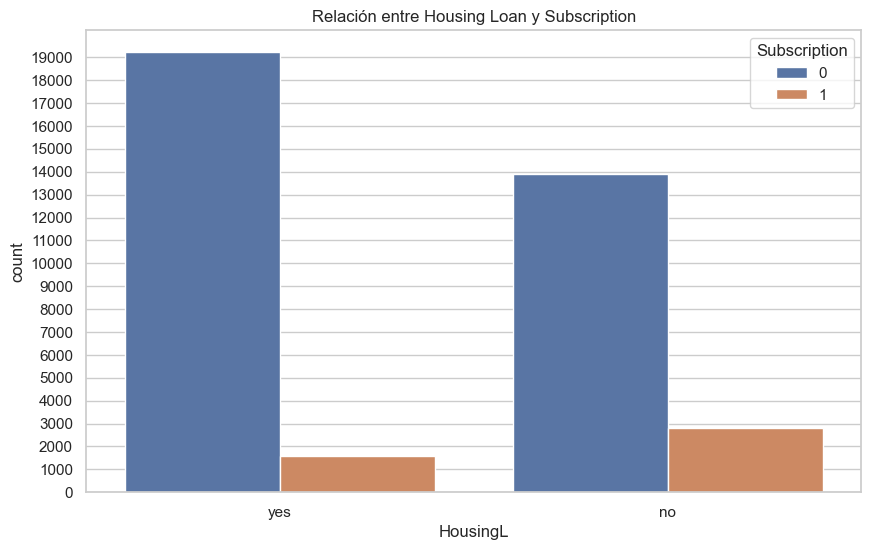

None


In [646]:
#Tatamiento de faltantes Housing Loan
print("Haciendo el sigueinte analisis se observa un alto porcentaje de subscriptos sin un Housing Loan")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
grafico=sns.countplot(x="HousingL", hue="Subscription", data=datos)
plt.yticks(np.arange(0, 20000, 1000))

plt.title("Relación entre Housing Loan y Subscription")
print(plt.show())


Viendo la distribucion de la suscripcion en funcion del Housing loan y que el numero de yes/no (con faltantes) es aproximadamente igual 55-45% se asignara NO a los que esten subscriptos y YES a los que no lo esten

 reimprimimos el grafico para comparar


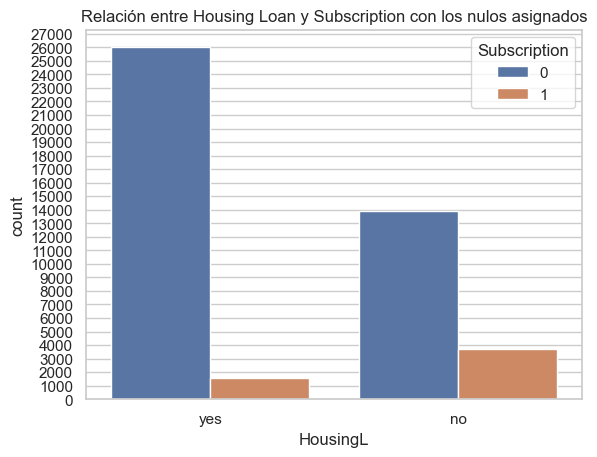

<Figure size 1000x600 with 0 Axes>

cantidad de daton nulos 0
se observa que ambas variables han aumentado en la forma deseada y no hay quedado nulos


In [647]:
# Reemplaza los valores NaN en 'HousingL' solo cuando 'Subscription' sea igual a 0
print("Viendo la distribucion de la suscripcion en funcion del Housing loan y que el numero de yes/no (con faltantes) es aproximadamente igual 55-45% se asignara NO a los que esten subscriptos y YES a los que no lo esten")
datos['HousingL'] = datos.apply(lambda row: 'yes' if pd.isna(row['HousingL']) and row['Subscription'] == 0 else row['HousingL'], axis=1)
datos['HousingL'] = datos.apply(lambda row: 'no' if pd.isna(row['HousingL']) and row['Subscription'] == 1 else row['HousingL'], axis=1)
print("\n reimprimimos el grafico para comparar")
sns.countplot(x="HousingL", hue="Subscription", data=datos)
plt.title("Relación entre Housing Loan y Subscription con los nulos asignados")
plt.yticks(np.arange(0, 28000, 1000))
plt.figure(figsize=(10, 6))

plt.show()
print("cantidad de daton nulos",datos.HousingL.isnull().sum())
print("se observa que ambas variables han aumentado en la forma deseada y no hay quedado nulos")

In [648]:
print("Datos unicos y cantidades en la variable Personal Loan \n", datos.PersonalL.value_counts(), "\n") 
Q = datos.PersonalL.shape[0]
nulos = datos["PersonalL"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")

Datos unicos y cantidades en la variable Personal Loan 
 no     31534
yes     5989
Name: PersonalL, dtype: int64 

la cantidad de valores nulos en la variable es de 7686 ,es decir, un 17.001039616005663 % de los datos totales


Para esta variable se hara un reemplazo similar 


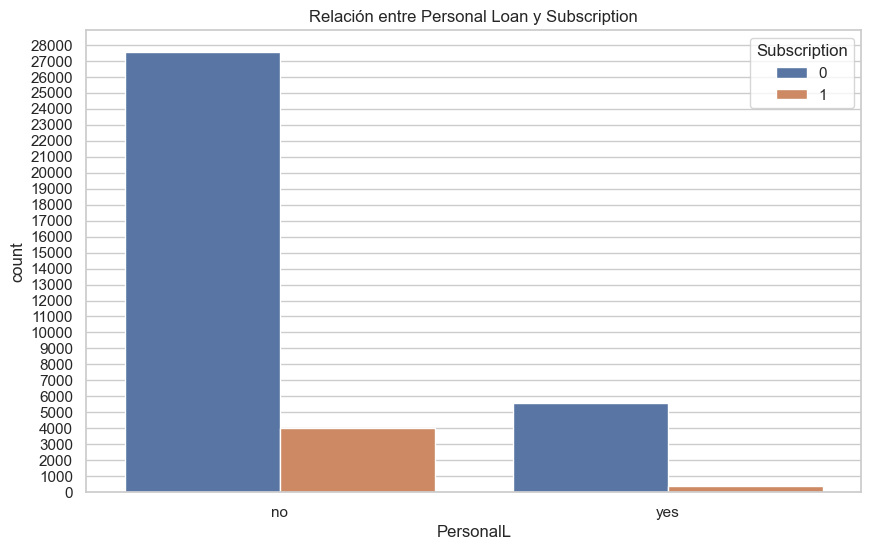

In [649]:
#Tatamiento de faltantes Personal Loan
print("Para esta variable se hara un reemplazo similar ")
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="PersonalL", hue="Subscription", data=datos)
plt.yticks(np.arange(0, 29000, 1000))
plt.title("Relación entre Personal Loan y Subscription")
plt.show()

Se le asignara NO a los que esten subscriptos y YES a los que no lo esten

 reimprimimos el grafico para comparar


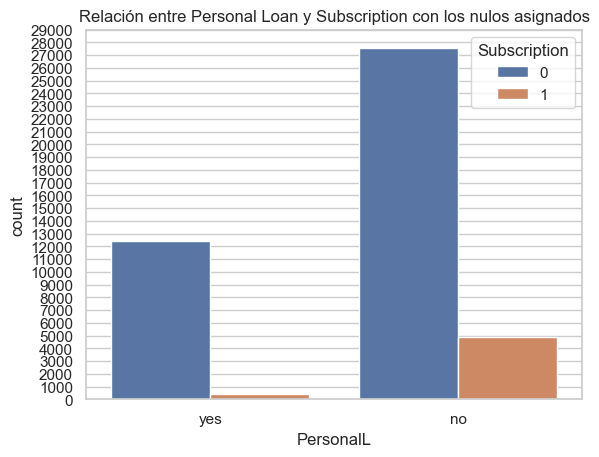

<Figure size 1500x1000 with 0 Axes>

cantidad de daton nulos 0
se observa que ambas variables han aumentado en la forma deseada y no hay quedado nulos


In [650]:
# Reemplaza los valores NaN en 'HousingL' solo cuando 'Subscription' sea igual a 0
print("Se le asignara NO a los que esten subscriptos y YES a los que no lo esten")
def asignar_valor(row):
    if row['Subscription'] == 0 and pd.isna(row['PersonalL']):
        return 'yes'
    elif row['Subscription'] == 1 and pd.isna(row['PersonalL']):
        return 'no'
    else:
        return row['PersonalL']
datos['PersonalL'] = datos.apply(asignar_valor, axis=1)
print("\n reimprimimos el grafico para comparar")
sns.countplot(x="PersonalL", hue="Subscription", data=datos)
plt.title("Relación entre Personal Loan y Subscription con los nulos asignados")
plt.yticks(np.arange(0, 30000, 1000))
plt.figure(figsize=(15, 10))
plt.show()
print("cantidad de daton nulos",datos.PersonalL.isnull().sum())
print("se observa que ambas variables han aumentado en la forma deseada y no hay quedado nulos")

In [651]:
print("Datos unicos y cantidades en la variable Contact \n", datos.Contact.value_counts(), "\n") 
Q = datos.Contact.shape[0]
nulos = datos["Contact"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")
print("No hay nulos no hacemos nada ya que al ser variable categorica no tiene outliers")

Datos unicos y cantidades en la variable Contact 
 cellular     29284
unknown      13020
telephone     2905
Name: Contact, dtype: int64 

la cantidad de valores nulos en la variable es de 0 ,es decir, un 0.0 % de los datos totales


In [652]:
print("Datos unicos y cantidades en la variable Poutcome \n", datos.Poutcome.value_counts(), "\n") 
Q = datos.Poutcome.shape[0]
nulos = datos["Poutcome"].isnull().sum()
print("la cantidad de valores nulos en la variable es de", nulos, ",es decir, un", nulos/Q*100, "% de los datos totales")
print("No hay nulos no hacemos nada ya que al ser variable categorica no tiene outliers")

Datos unicos y cantidades en la variable Poutcome 
 unknown    36958
failure     4901
other       1839
success     1511
Name: Poutcome, dtype: int64 

la cantidad de valores nulos en la variable es de 0 ,es decir, un 0.0 % de los datos totales
No hay nulos no hacemos nada ya que al ser variable categorica no tiene outliers


In [656]:
print("Genial ya tenemos nuestro dataset curado, es hora de guardarlo para poder hacer el algoritmo de clasificacion en otro notebook")
print("siendo este finalmente de: ", datos.shape,"Filas y columnas respectivamente")

Genial ya tenemos nuestro dataset curado, es hora de guardarlo para poder hacer el algoritmo de clasificacion en otro notebook
siendo este finalmente de:  (45209, 15) Filas y columnas respectivamente


In [657]:
print("Lo guardaremos como DatosTPF")
datos.to_csv('DatosTPF.csv', index=False)

Lo guardaremos como DatosTPF
